In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import  DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import tree
from dtreeviz.trees import dtreeviz
import graphviz

In [2]:
df = pd.read_csv('E:\ExcelR Assignment\Assignment 14 - Decision Tree\Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


### Univariate Analysis

<AxesSubplot:xlabel='Price', ylabel='Count'>

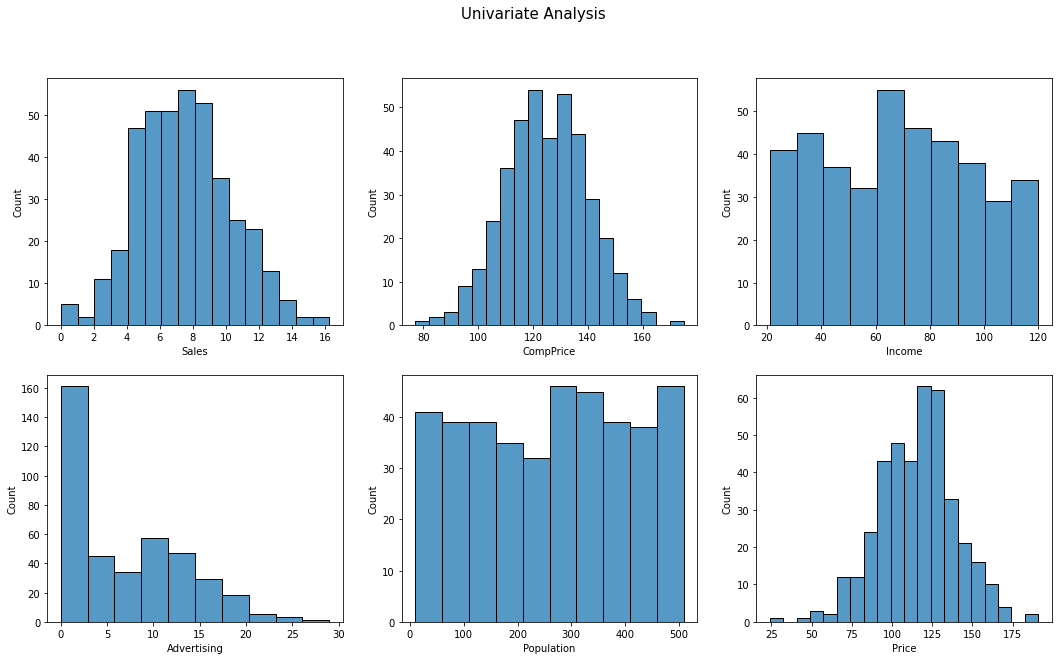

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Univariate Analysis',fontsize=15)
sns.histplot(df.Sales,ax=axes[0, 0])
sns.histplot(df.CompPrice,ax=axes[0, 1])
sns.histplot(df.Income,ax=axes[0, 2])
sns.histplot(df.Advertising,ax=axes[1, 0])
sns.histplot(df.Population,ax=axes[1, 1])
sns.histplot(df.Price,ax=axes[1, 2])

#### From here we can say that Parameters other than Income, Advertising, Population are Normally Distributed

<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

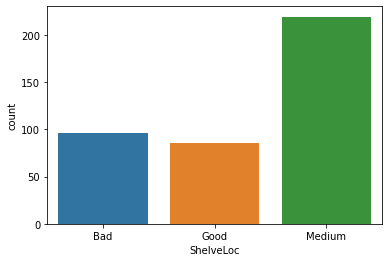

In [6]:
sns.countplot(data=df,x='ShelveLoc')

<AxesSubplot:xlabel='Urban', ylabel='count'>

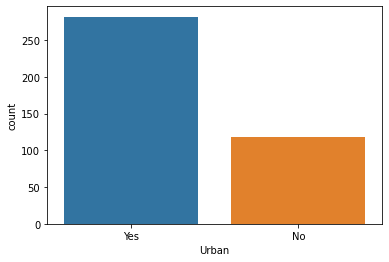

In [7]:
sns.countplot(data=df,x='Urban')

<AxesSubplot:xlabel='US', ylabel='count'>

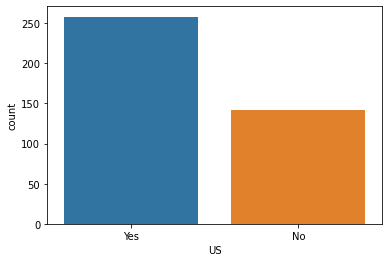

In [8]:
sns.countplot(data=df,x='US')

#### We can infer that Medium Shelf Location, Urban, and US count is maximum

### Bivariate Analysis

<AxesSubplot:xlabel='Sales', ylabel='Age'>

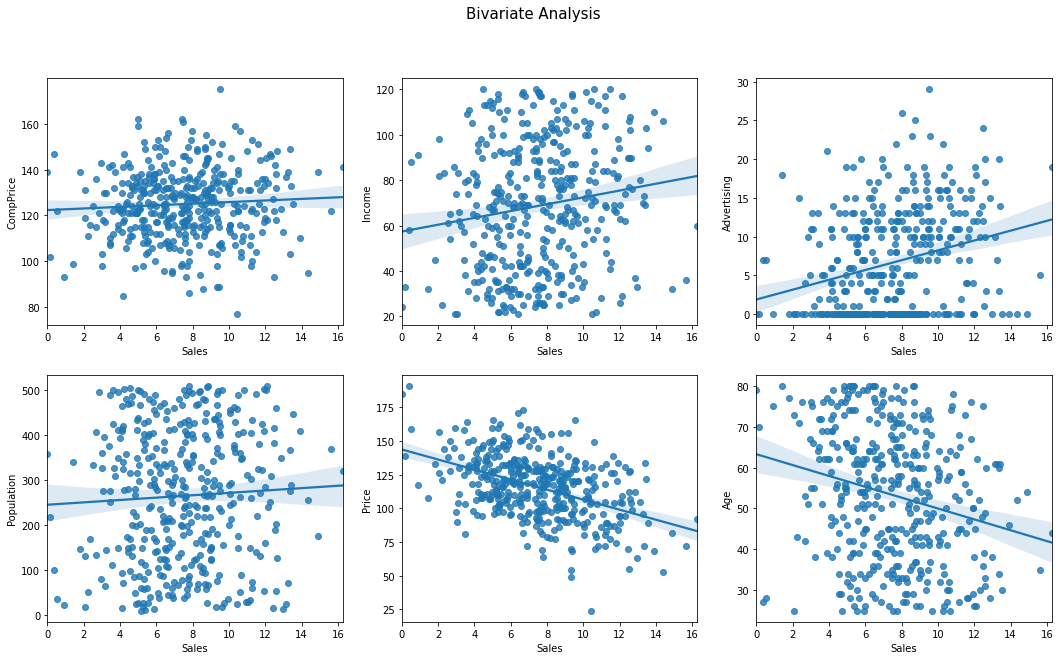

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Bivariate Analysis',fontsize=15)
sns.regplot(data=df,x='Sales',y='CompPrice',ax=axes[0, 0])
sns.regplot(data=df,ax=axes[0, 1],x='Sales',y='Income')
sns.regplot(data=df,ax=axes[0, 2],x='Sales',y='Advertising')
sns.regplot(data=df,ax=axes[1, 0],x='Sales',y='Population')
sns.regplot(data=df,ax=axes[1, 1],x='Sales',y='Price')
sns.regplot(data=df,ax=axes[1, 2],x='Sales',y='Age')

### Positive Relationships:
- Income vs Sales
- Advertising vs Sales

### Negative Relationships:
- Price vs Sales
- Age vs Sales

### Arranging List by Sales

In [10]:
df = df.sort_values(by=['Sales']).reset_index()
df.head()

,index,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,174,0.00,139,24,0,358,185,Medium,79,15,No,No
1,106,0.16,102,33,0,217,139,Medium,70,18,No,No
2,165,0.37,147,58,7,100,191,Bad,27,15,Yes,Yes
3,143,0.53,122,88,7,36,159,Bad,28,17,Yes,Yes
4,57,0.91,93,91,0,22,117,Bad,75,11,Yes,No


In [11]:
df = df.drop(['index'],axis=1)

In [12]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.00,139,24,0,358,185,Medium,79,15,No,No
1,0.16,102,33,0,217,139,Medium,70,18,No,No
2,0.37,147,58,7,100,191,Bad,27,15,Yes,Yes
3,0.53,122,88,7,36,159,Bad,28,17,Yes,Yes
4,0.91,93,91,0,22,117,Bad,75,11,Yes,No


### Binning with Sales Value (Values approximated considering Histogram Plot)

In [13]:
df.loc[df.Sales<=7.5,'sales'] ='Low'
df.loc[df.Sales>7.5,'sales'] ='High'

In [14]:
df.loc[5,'sales'],df.loc[140,'sales'],df.loc[380,'sales']

('Low', 'Low', 'High')

In [15]:
df1 = df.copy()
df1 = df1.drop(['Sales'],axis=1)

### Label Encoding

In [16]:
label_encoder = preprocessing.LabelEncoder()
df1['LabelShelveLoc']= label_encoder.fit_transform(df1['ShelveLoc'])
df1['LabelUrban']= label_encoder.fit_transform(df1['Urban'])
df1['LabelUS']= label_encoder.fit_transform(df1['US'])
df1['Labelsales']= label_encoder.fit_transform(df1['sales'])
df1.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales,LabelShelveLoc,LabelUrban,LabelUS,Labelsales
0,139,24,0,358,185,Medium,79,15,No,No,Low,2,0,0,1
1,102,33,0,217,139,Medium,70,18,No,No,Low,2,0,0,1


In [17]:
df1 = df1.drop(['ShelveLoc','Urban','US','sales'],axis=1)

In [18]:
df1.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,LabelShelveLoc,LabelUrban,LabelUS,Labelsales
0,139,24,0,358,185,79,15,2,0,0,1
1,102,33,0,217,139,70,18,2,0,0,1
2,147,58,7,100,191,27,15,0,1,1,1
3,122,88,7,36,159,28,17,0,1,1,1
4,93,91,0,22,117,75,11,0,1,0,1


In [19]:
X = df1.iloc[:,0:-1]
y= df1.iloc[:,-1]

In [20]:
# Splitting data into training and testing data set
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=10,stratify=y)

In [21]:
y_train.value_counts(normalize=True),y_test.value_counts(normalize=True)

(1    0.503571
 0    0.496429
 Name: Labelsales, dtype: float64,
 1    0.508333
 0    0.491667
 Name: Labelsales, dtype: float64)

### Building Model with Gini Criterion

In [22]:
dtmodel = DecisionTreeClassifier(random_state=10,max_depth=5,criterion='gini')
dtmodel.fit(X_train,y_train)
dtmodel.score(X_train,y_train)

0.8857142857142857

In [23]:
dtmodel.score(X_test,y_test)

0.65

### Tuning max_depth value

In [24]:
train_Accuracy = []
test_Accuracy = []

for depth in range(1,10):
    dtmodel = DecisionTreeClassifier(max_depth = depth,random_state=10,criterion='gini')
    dtmodel.fit(X_train,y_train)
    train_Accuracy.append(dtmodel.score(X_train,y_train))
    test_Accuracy.append(dtmodel.score(X_test,y_test))

In [25]:
frame = pd.DataFrame({'max_depth':range(1,10),'Train_Acc':train_Accuracy,'Test_Acc':test_Accuracy})
frame

,max_depth,Train_Acc,Test_Acc
0,1,0.675000,0.575000
1,2,0.703571,0.600000
2,3,0.782143,0.633333
3,4,0.821429,0.591667
4,5,0.885714,0.650000
5,6,0.928571,0.616667
6,7,0.957143,0.633333
7,8,0.971429,0.650000
8,9,0.978571,0.633333


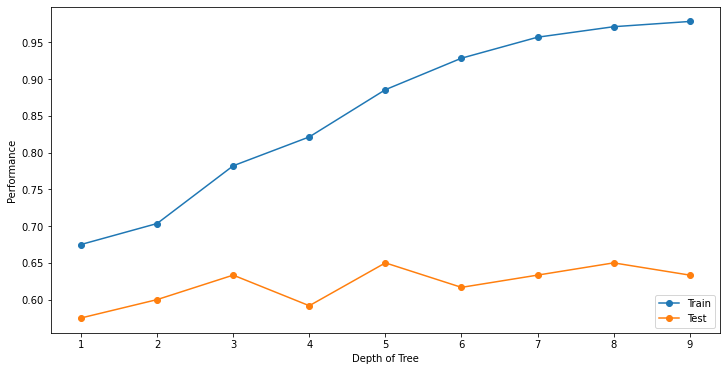

In [26]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['Train_Acc'],marker='o')
plt.plot(frame['max_depth'],frame['Test_Acc'],marker='o')
plt.xlabel('Depth of Tree')
plt.ylabel('Performance')
plt.legend(['Train','Test'],loc="lower right")

#### From here we can identify that max_depth = 5 is best it gives around 65% Accuracy for Test set and 88% for Train Set.

-   We have to further tune more Parameters like max_leaf_nodes

### Tuning max_leaf_nodes value

In [27]:
train_Accuracy = []
test_Accuracy = []

for nodes in range(2,15):
    dtmodel = DecisionTreeClassifier(max_depth = 5,max_leaf_nodes=nodes,random_state=10,criterion='gini')
    dtmodel.fit(X_train,y_train)
    train_Accuracy.append(dtmodel.score(X_train,y_train))
    test_Accuracy.append(dtmodel.score(X_test,y_test))

In [28]:
frame = pd.DataFrame({'max_leaf_nodes':range(2,15),'Train_Acc':train_Accuracy,'Test_Acc':test_Accuracy})
frame

,max_leaf_nodes,Train_Acc,Test_Acc
0,2,0.675000,0.575000
1,3,0.692857,0.600000
2,4,0.746429,0.633333
3,5,0.757143,0.633333
4,6,0.782143,0.633333
5,7,0.782143,0.633333
6,8,0.817857,0.650000
7,9,0.817857,0.650000
8,10,0.839286,0.633333
9,11,0.839286,0.633333


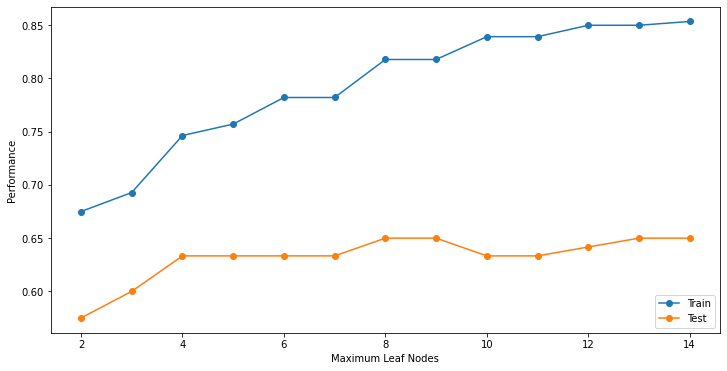

In [29]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_leaf_nodes'],frame['Train_Acc'],marker='o')
plt.plot(frame['max_leaf_nodes'],frame['Test_Acc'],marker='o')
plt.xlabel('Maximum Leaf Nodes')
plt.ylabel('Performance')
plt.legend(['Train','Test'],loc="lower right")

#### So Maximum Leaf Nodes should be 8 from analysis.
### We will now try building model with our depth and node values

In [30]:
dtmodel = DecisionTreeClassifier(max_depth = 5 , max_leaf_nodes = 8, random_state=10,criterion='gini')
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=8, random_state=10)

In [31]:
dtmodel.score(X_train,y_train),dtmodel.score(X_test,y_test)

(0.8178571428571428, 0.65)

In [32]:
pred = dtmodel.predict(X_test)

In [33]:
pd.Series(pred).value_counts()

1    69
0    51
dtype: int64

In [34]:
pd.crosstab(y_test,pred)

col_0,0,1
Labelsales,,
0,34,25
1,17,44


In [35]:
np.mean(pred == y_test)

0.65

### Visualizing Tree

[Text(167.40000000000003, 199.32, 'X[4] <= 124.5\ngini = 0.5\nsamples = 280\nvalue = [139, 141]'),
 Text(100.44000000000001, 163.07999999999998, 'X[2] <= 7.5\ngini = 0.464\nsamples = 180\nvalue = [114, 66]'),
 Text(66.96000000000001, 126.83999999999999, 'X[4] <= 90.5\ngini = 0.499\nsamples = 105\nvalue = [50, 55]'),
 Text(33.480000000000004, 90.6, 'gini = 0.245\nsamples = 21\nvalue = [18, 3]'),
 Text(100.44000000000001, 90.6, 'X[7] <= 0.5\ngini = 0.472\nsamples = 84\nvalue = [32, 52]'),
 Text(66.96000000000001, 54.359999999999985, 'gini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(133.92000000000002, 54.359999999999985, 'X[7] <= 1.5\ngini = 0.498\nsamples = 66\nvalue = [31, 35]'),
 Text(100.44000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(167.40000000000003, 18.119999999999976, 'gini = 0.469\nsamples = 56\nvalue = [21, 35]'),
 Text(133.92000000000002, 126.83999999999999, 'gini = 0.25\nsamples = 75\nvalue = [64, 11]'),
 Text(234.36, 163.07999999

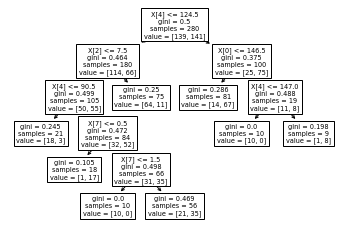

In [36]:
tree.plot_tree(dtmodel,max_depth=5)

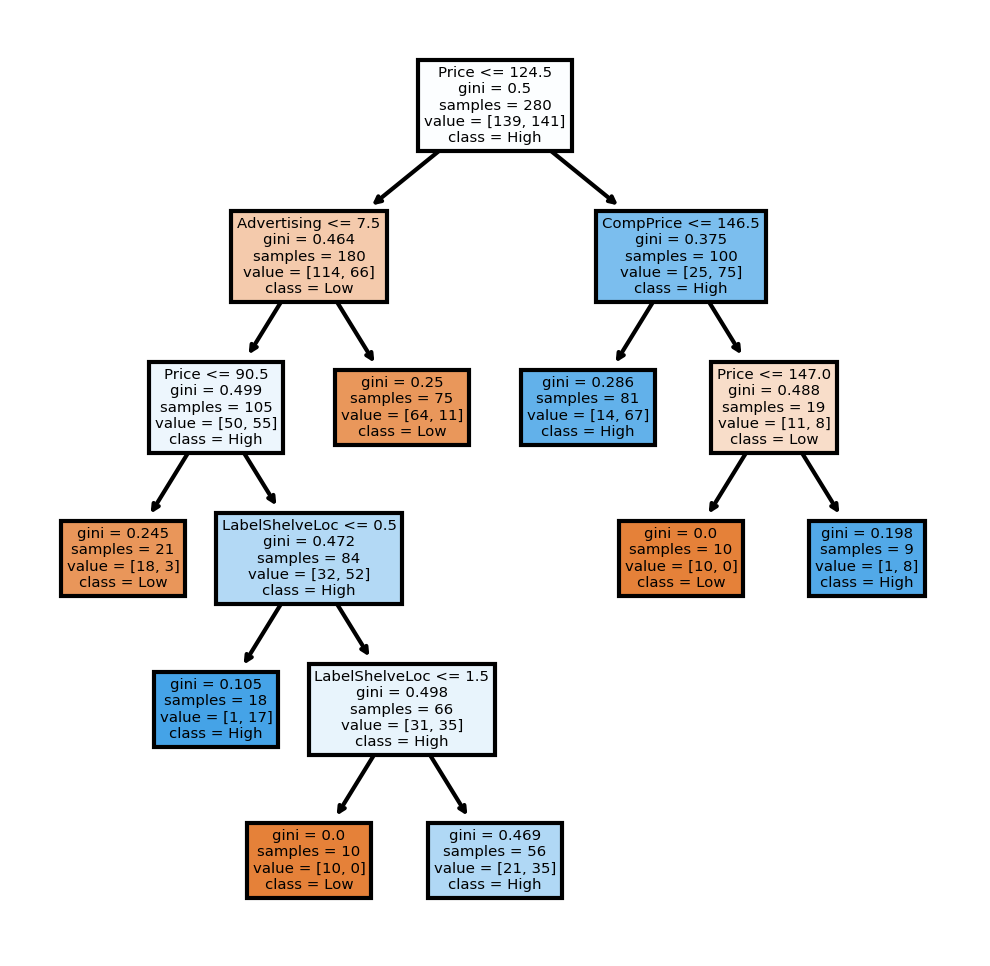

In [37]:
cn=['Low', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtmodel,
               feature_names = X_train.columns, max_depth=5,
               class_names=cn,
               filled = True);

### Building model with Entropy

In [38]:
dtmodel1 = DecisionTreeClassifier(random_state=10,max_depth=5,criterion='entropy')
dtmodel1.fit(X_train,y_train)
dtmodel1.score(X_train,y_train)

0.8892857142857142

In [39]:
dtmodel1.score(X_test,y_test)

0.675

### Tuning max_depth value

In [40]:
train_Accuracy = []
test_Accuracy = []

for depth in range(1,10):
    dtmodel1 = DecisionTreeClassifier(max_depth = depth,random_state=10,criterion='entropy')
    dtmodel1.fit(X_train,y_train)
    train_Accuracy.append(dtmodel1.score(X_train,y_train))
    test_Accuracy.append(dtmodel1.score(X_test,y_test))

In [41]:
frame = pd.DataFrame({'max_depth':range(1,10),'Train_Acc':train_Accuracy,'Test_Acc':test_Accuracy})
frame

,max_depth,Train_Acc,Test_Acc
0,1,0.675000,0.575000
1,2,0.692857,0.600000
2,3,0.771429,0.700000
3,4,0.807143,0.675000
4,5,0.889286,0.675000
5,6,0.925000,0.716667
6,7,0.957143,0.700000
7,8,0.971429,0.716667
8,9,0.978571,0.708333


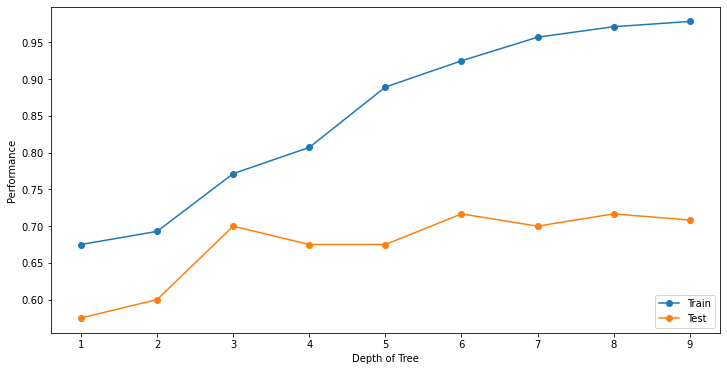

In [42]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['Train_Acc'],marker='o')
plt.plot(frame['max_depth'],frame['Test_Acc'],marker='o')
plt.xlabel('Depth of Tree')
plt.ylabel('Performance')
plt.legend(['Train','Test'],loc="lower right")

#### From here we can identify that max_depth = 6 is best it gives around 72% Accuracy for Test set and 93% for Train Set.

-   We have to further tune more Parameters like max_leaf_nodes

### Tuning max_leaf_nodes value

In [43]:
train_Accuracy = []
test_Accuracy = []

for nodes in range(2,15):
    dtmodel1 = DecisionTreeClassifier(max_depth = 6,max_leaf_nodes=nodes,random_state=10,criterion='entropy')
    dtmodel1.fit(X_train,y_train)
    train_Accuracy.append(dtmodel1.score(X_train,y_train))
    test_Accuracy.append(dtmodel1.score(X_test,y_test))

In [44]:
frame = pd.DataFrame({'max_leaf_nodes':range(2,15),'Train_Acc':train_Accuracy,'Test_Acc':test_Accuracy})
frame

,max_leaf_nodes,Train_Acc,Test_Acc
0,2,0.675000,0.575000
1,3,0.692857,0.600000
2,4,0.746429,0.633333
3,5,0.746429,0.633333
4,6,0.771429,0.700000
5,7,0.771429,0.700000
6,8,0.771429,0.700000
7,9,0.807143,0.716667
8,10,0.828571,0.700000
9,11,0.828571,0.700000


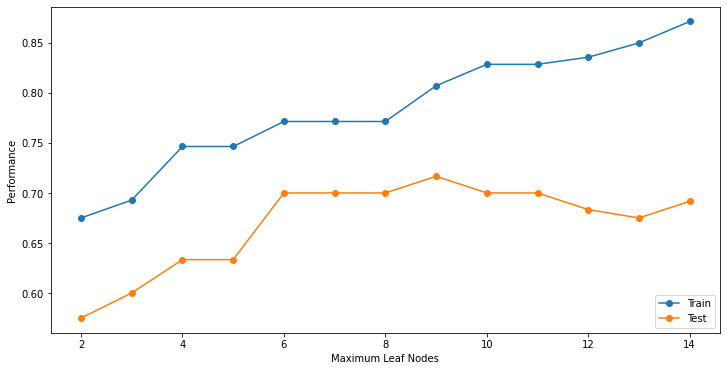

In [45]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_leaf_nodes'],frame['Train_Acc'],marker='o')
plt.plot(frame['max_leaf_nodes'],frame['Test_Acc'],marker='o')
plt.xlabel('Maximum Leaf Nodes')
plt.ylabel('Performance')
plt.legend(['Train','Test'],loc="lower right")

#### So Maximum Leaf Nodes should be 9 from analysis.
### We will now try building model with our depth and node values

In [46]:
dtmodel1 = DecisionTreeClassifier(random_state=10,max_depth=6,max_leaf_nodes=9,criterion='entropy')
dtmodel1.fit(X_train,y_train)
dtmodel1.score(X_train,y_train)

0.8071428571428572

In [47]:
dtmodel1.score(X_test,y_test)

0.7166666666666667

In [48]:
pred = dtmodel1.predict(X_test)

In [49]:
pd.Series(pred).value_counts()

0    61
1    59
dtype: int64

In [50]:
pd.crosstab(y_test,pred)

col_0,0,1
Labelsales,,
0,43,16
1,18,43


In [51]:
np.mean(pred == y_test)

0.7166666666666667

[Text(181.35000000000002, 199.32, 'X[4] <= 124.5\nentropy = 1.0\nsamples = 280\nvalue = [139, 141]'),
 Text(111.60000000000001, 163.07999999999998, 'X[2] <= 7.5\nentropy = 0.948\nsamples = 180\nvalue = [114, 66]'),
 Text(55.800000000000004, 126.83999999999999, 'X[4] <= 90.5\nentropy = 0.998\nsamples = 105\nvalue = [50, 55]'),
 Text(27.900000000000002, 90.6, 'entropy = 0.592\nsamples = 21\nvalue = [18, 3]'),
 Text(83.7, 90.6, 'X[7] <= 0.5\nentropy = 0.959\nsamples = 84\nvalue = [32, 52]'),
 Text(55.800000000000004, 54.359999999999985, 'entropy = 0.31\nsamples = 18\nvalue = [1, 17]'),
 Text(111.60000000000001, 54.359999999999985, 'X[7] <= 1.5\nentropy = 0.997\nsamples = 66\nvalue = [31, 35]'),
 Text(83.7, 18.119999999999976, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(139.5, 18.119999999999976, 'entropy = 0.954\nsamples = 56\nvalue = [21, 35]'),
 Text(167.4, 126.83999999999999, 'X[0] <= 108.5\nentropy = 0.601\nsamples = 75\nvalue = [64, 11]'),
 Text(139.5, 90.6, 'entropy = 0.9

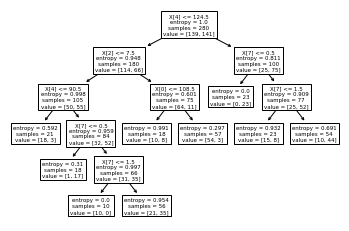

In [52]:
tree.plot_tree(dtmodel1,max_depth=6)

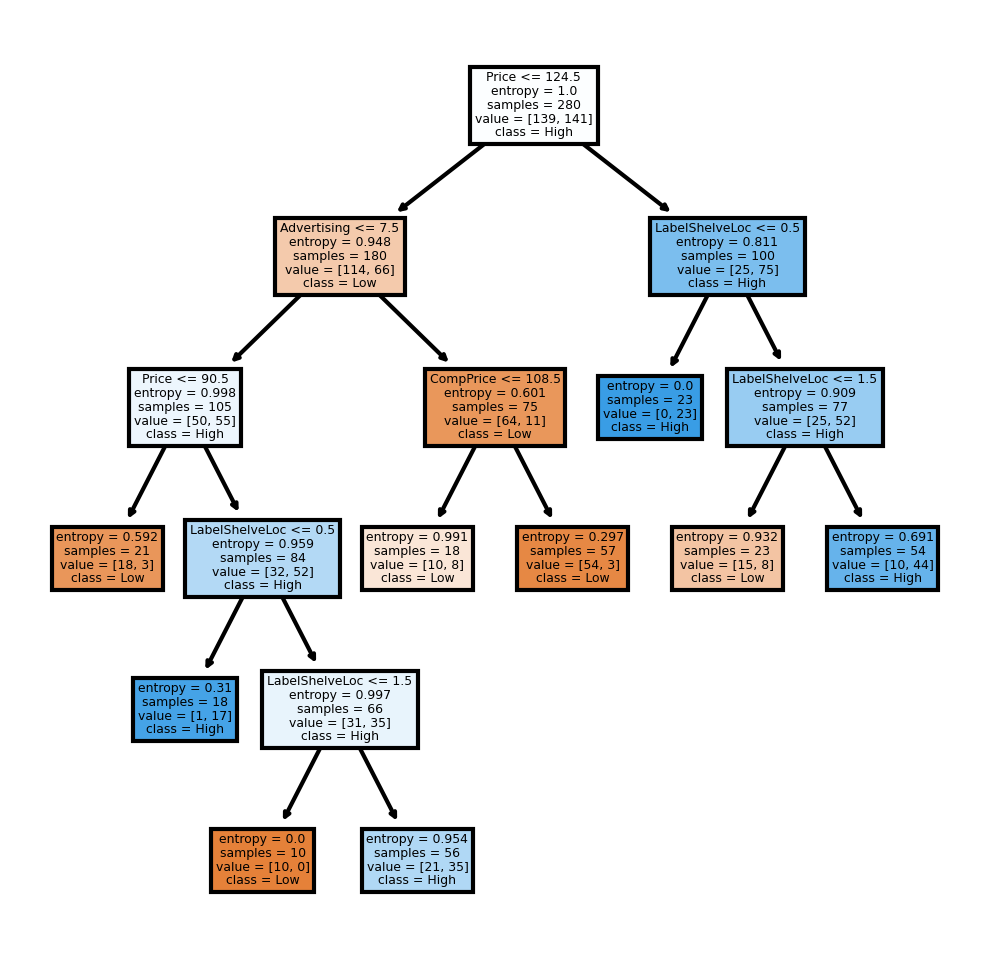

In [53]:
cn=['Low', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtmodel1,
               feature_names = X_train.columns, max_depth=5,
               class_names=cn,
               filled = True);

In [56]:
griddtmodel = DecisionTreeClassifier()

In [71]:
a=[2,3,4,5,6,7,8,9,10]
parameter = [{'max_depth':a,'max_leaf_nodes':a,'criterion':['entropy','gini'],'min_samples_split':a,'min_samples_leaf':a}]

In [66]:
from sklearn.model_selection import GridSearchCV

In [72]:
b = GridSearchCV(griddtmodel,parameter)

In [73]:
b.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}])

In [74]:
b.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [75]:
b.best_score_

0.7321428571428572

### Building Model with Best Parameters achieved from Grid Search

In [76]:
fdtmodel = DecisionTreeClassifier(random_state=10,max_depth=5,max_leaf_nodes=10,min_samples_leaf=3,min_samples_split=2,criterion='gini')

In [77]:
fdtmodel.fit(X_train,y_train)
fdtmodel.score(X_train,y_train)

0.8392857142857143

In [78]:
fdtmodel.score(X_test,y_test)

0.6333333333333333

## Conclusion:

1. Gini Method
- Train Accuracy: 82
- Test Accuracy: 65

2. Entropy Method
- Train Accuracy: 80
- Test Accuracy: 72

3. Gridsearch
- Train Accuracy: 84
- Test Accuracy: 63